# import necessary library

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error

In [4]:
!pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install catboost


Defaulting to user installation because normal site-packages is not writeable


In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNetCV
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from catboost import CatBoostRegressor

In [8]:
ins = pd.read_csv("insurance.csv")
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
ins.shape

(1338, 7)

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance



In [10]:
ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
j = ins.children.unique()

In [13]:
j

array([0, 1, 3, 2, 5, 4], dtype=int64)

# Handaling duplicates

Handaling duplicate

In [14]:
# Handle duplicates
duplicate_rows_data = ins[ins.duplicated()]
duplicate_rows_data
print("number of duplicate rows: ", duplicate_rows_data.shape)


number of duplicate rows:  (1, 7)


In [15]:
ins = ins.drop_duplicates()

In [16]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
ins.shape

(1337, 7)

uniqueness

In [18]:
for column in ins.columns:
    no_distinctvalues = len(ins[column].unique())
    print(f"{column}: {no_distinctvalues} distinct values")

age: 47 distinct values
sex: 2 distinct values
bmi: 548 distinct values
children: 6 distinct values
smoker: 2 distinct values
region: 4 distinct values
charges: 1337 distinct values


Missing values

In [19]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Describe

In [20]:
ins.describe().style.format('{:.2f}')

,age,bmi,children,charges
count,1337.00,1337.00,1337.00,1337.00
mean,39.22,30.66,1.10,13279.12
std,14.04,6.10,1.21,12110.36
min,18.00,15.96,0.00,1121.87
25%,27.00,26.29,0.00,4746.34
50%,39.00,30.40,1.00,9386.16
75%,51.00,34.70,2.00,16657.72
max,64.00,53.13,5.00,63770.43


# Univariate Analysis

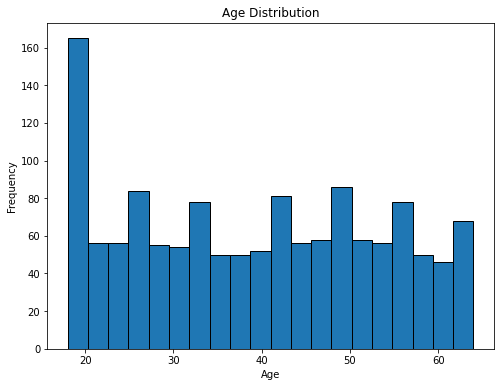

In [21]:
#visulization of age:Histogram
plt.figure(figsize=( 8,6))
plt.hist(ins['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

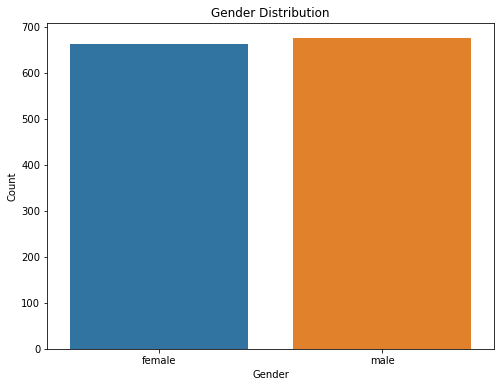

In [22]:
# Visualization : Bar plot of gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data = ins, x='sex')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

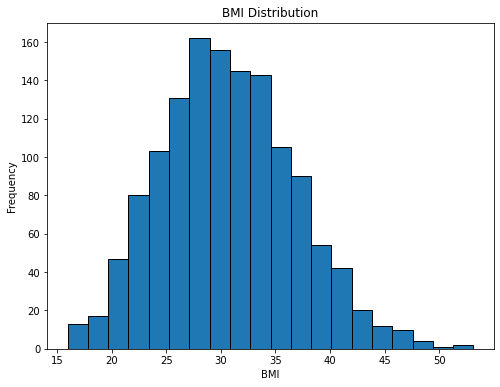

In [23]:
# Visualization : Histogram of BMI values
plt.figure(figsize=(8, 6))
plt.hist(ins['bmi'], bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.savefig("C:\\Users\\debaj\\Desktop\\Project Practis\\medical project\\medical project\\bmi.png")
plt.show()

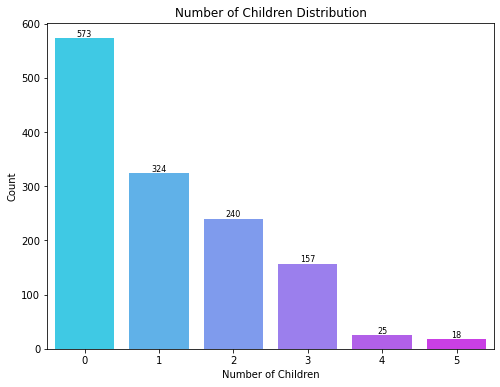

In [24]:
# Visualization : Bar plot of the number of children/dependents
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=ins, x='children',palette = "cool")
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Number of Children Distribution')
# Display count on top of each bar
for p in ax.patches:
    count = p.get_height()
    ax.annotate(f'{int(count)}', (p.get_x() + p.get_width() / 2.0, count), ha='center', va='bottom', fontsize=8)
plt.savefig("C:\\Users\\debaj\\Desktop\\Project Practis\\medical project\\medical project\\children.png")
    
plt.show()


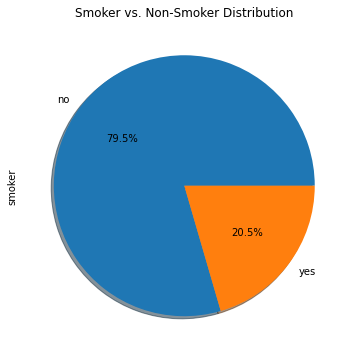

In [25]:
# Visualization : Pie chart of smoker vs. non-smoker distribution
plt.figure(figsize=(8, 6))
#explode = [0.05,0]
ins['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%',shadow = True)
plt.title('Smoker vs. Non-Smoker Distribution')
plt.show()

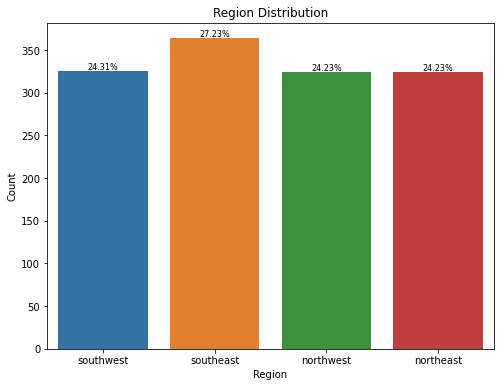

In [26]:
 #Visualization : Bar plot of region distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=ins, x='region')
total_samples = ins.shape[0]
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution') 
for p in ax.patches:
    count = p.get_height()
    percentage = count / total_samples * 100  # Calculate percentage
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2.0, count),
                ha='center', va='bottom', fontsize=8)
plt.show()

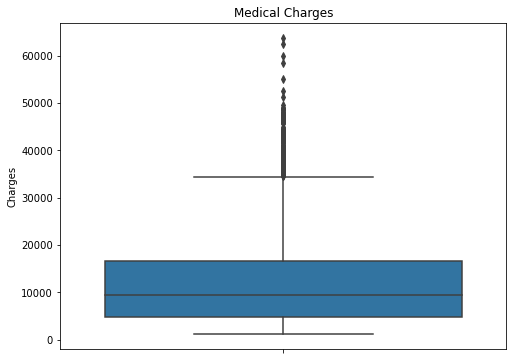

In [27]:
# Visualization : Box plot of medical charges
plt.figure(figsize=(8, 6))
sns.boxplot(data=ins, y='charges')
plt.ylabel('Charges')
plt.title('Medical Charges')
plt.savefig("C:\\Users\\debaj\\Desktop\\Project Practis\\medical project\\medical project\\medical_charges_box.png")

plt.show()

# Bivariate Analysis

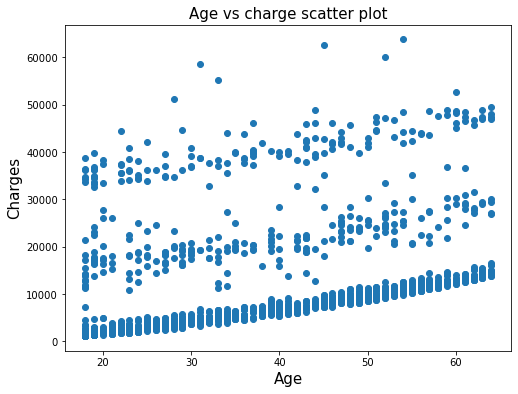

In [28]:
#scatter plot age vs charge
plt.figure(figsize = (8,6))
plt.scatter(ins["age"],ins["charges"])
plt.xlabel("Age",fontsize = 15)
plt.ylabel("Charges",fontsize = 15)
plt.title("Age vs charge scatter plot",fontsize = 15)
plt.show()


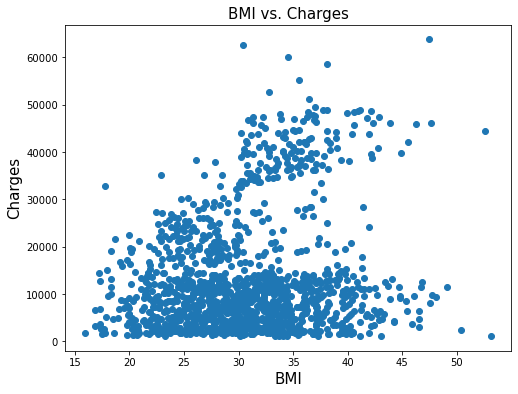

In [29]:
#Visualization : Scatter plot of BMI vs. charges
plt.figure(figsize=(8, 6))
plt.scatter(ins['bmi'], ins['charges'])
plt.xlabel('BMI',fontsize = 15)
plt.ylabel('Charges',fontsize = 15)
plt.title('BMI vs. Charges',fontsize = 15)
plt.show()

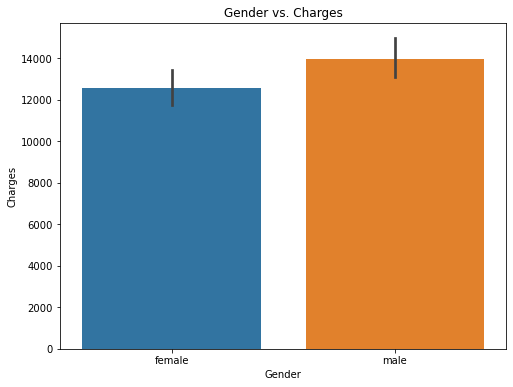

In [30]:
# Visualization : Grouped bar plot of gender vs. charges
plt.figure(figsize=(8, 6))
sns.barplot(data=ins, x='sex', y='charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Gender vs. Charges')
plt.show()

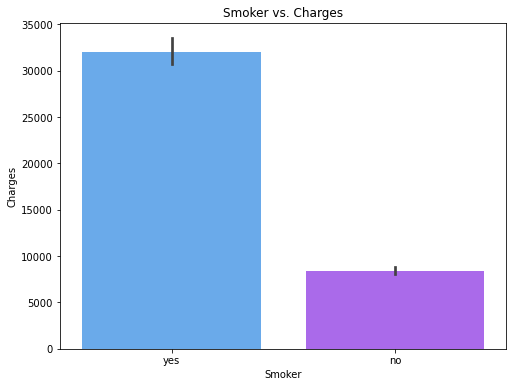

In [31]:
# Visualization : Grouped bar plot of smoker vs. charges
plt.figure(figsize=(8, 6))
sns.barplot(data=ins, x='smoker', y='charges',palette = "cool")
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs. Charges')
plt.savefig("C:\\Users\\debaj\\Desktop\\Project Practis\\medical project\\medical project\\smoker_charges_barplot.png")

plt.show()

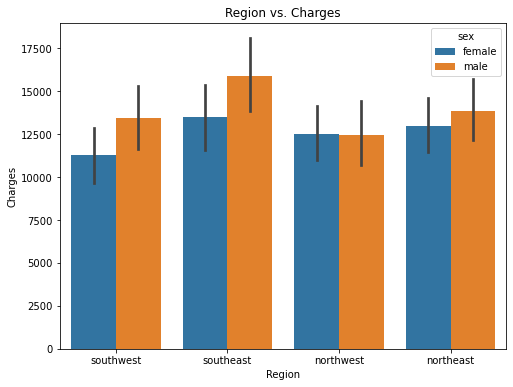

In [32]:
# Visualization : Stacked bar plot of region vs. charges
plt.figure(figsize=(8, 6))
sns.barplot(data=ins, x='region', y='charges', hue='sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs. Charges')
plt.show()

In [33]:
#avg_charges_by_age = ins.groupby('age')['charges'].mean()
#avg_charges_by_age


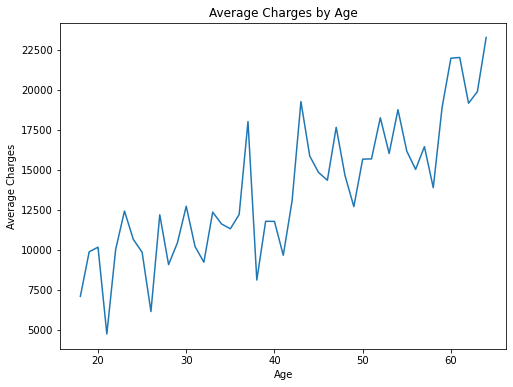

In [34]:
# Visualization : Line plot showing the average charges by age
avg_charges_by_age = ins.groupby('age')['charges'].mean()
plt.figure(figsize=(8, 6))
plt.plot(avg_charges_by_age.index, avg_charges_by_age.values)
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age')
plt.savefig("C:\\Users\\debaj\\Desktop\\Project Practis\\medical project\\medical project\\average_charges_age.png")

plt.show()


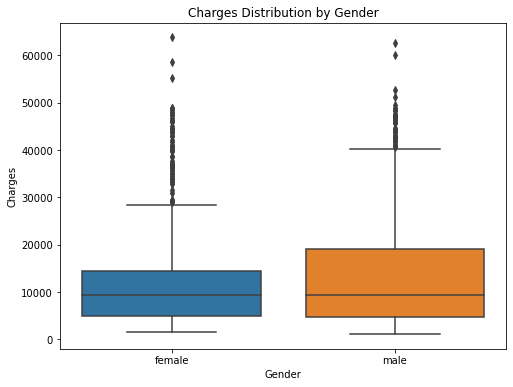

In [35]:
# Visualization : Box plot of charges grouped by gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=ins, x='sex', y='charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Charges Distribution by Gender')
plt.show()

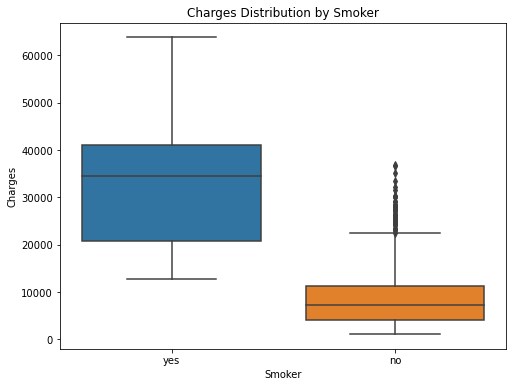

In [36]:
# Visualization : Box plot of charges grouped by smoker vs. non-smoker
plt.figure(figsize=(8, 6))
sns.boxplot(data=ins, x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution by Smoker')
plt.show()

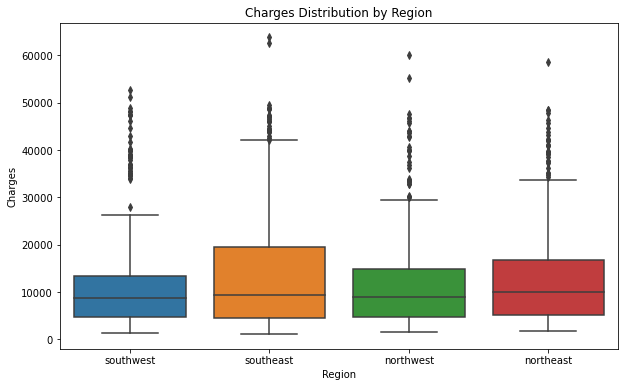

In [37]:
# Visualization : Box plot of charges grouped by region
plt.figure(figsize=(10, 6))
sns.boxplot(data=ins, x='region', y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Region')
plt.show()

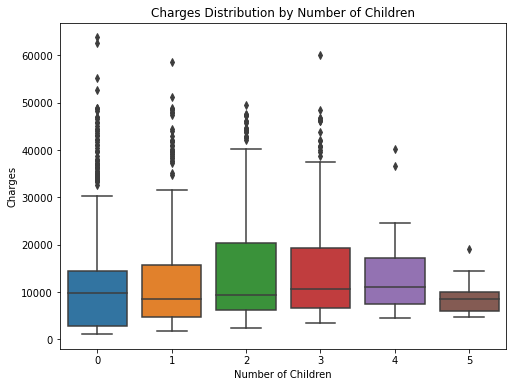

In [38]:
# Visualization : Box plot of charges grouped by the number of children
plt.figure(figsize=(8, 6))
sns.boxplot(data=ins, x='children', y='charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.title('Charges Distribution by Number of Children')
plt.savefig("C:\\Users\\debaj\\Desktop\\Project Practis\\medical project\\medical project\\children_charges_box.png")

plt.show()

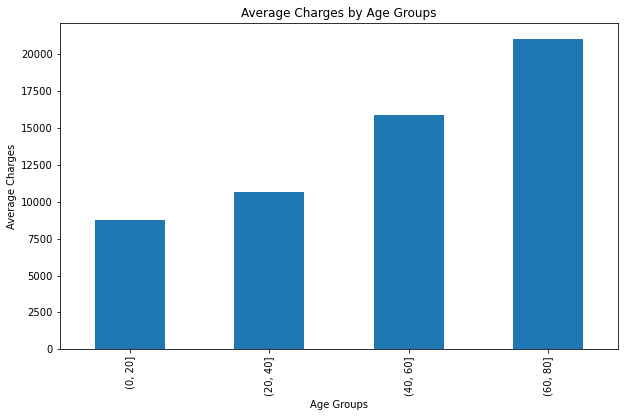

In [39]:
# Visualization : Bar plot of the average charges for different age groups
age_groups = pd.cut(ins['age'], bins=[0, 20, 40, 60, 80])
avg_charges_by_age_groups = ins.groupby(age_groups)['charges'].mean()
plt.figure(figsize=(10, 6))
avg_charges_by_age_groups.plot(kind='bar')
plt.xlabel('Age Groups')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age Groups')
plt.show()

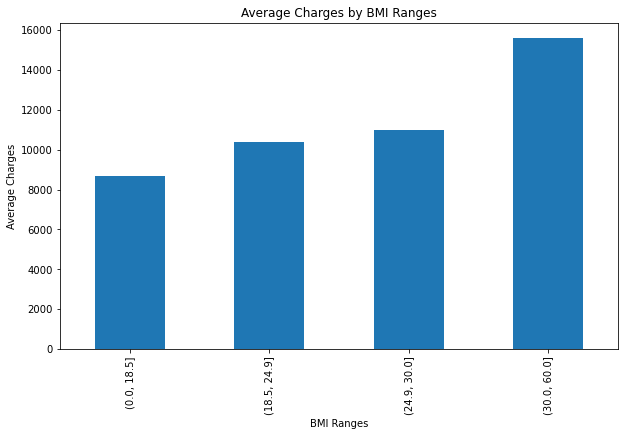

In [40]:
# Visualization : Bar plot of the average charges for different BMI ranges
bmi_ranges = pd.cut(ins['bmi'], bins=[0, 18.5, 24.9, 30, 60])
avg_charges_by_bmi_ranges = ins.groupby(bmi_ranges)['charges'].mean()
plt.figure(figsize=(10, 6))
avg_charges_by_bmi_ranges.plot(kind='bar')
plt.xlabel('BMI Ranges')
plt.ylabel('Average Charges')
plt.title('Average Charges by BMI Ranges')
plt.show()

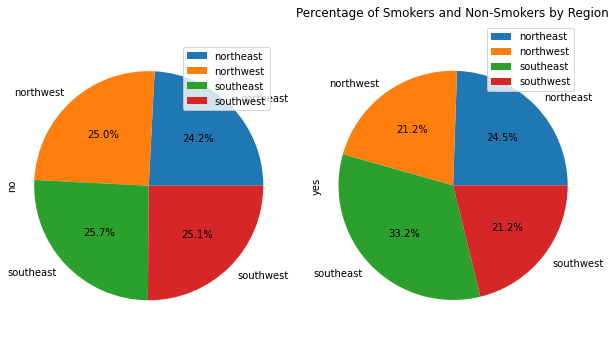

In [41]:
# Visualization : Pie chart of the percentage of smokers and non-smokers for each region
region_smoker_counts = ins.groupby(['region', 'smoker']).size().unstack()
region_smoker_counts.plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%', subplots=True)
plt.legend(loc='upper right')
plt.title('Percentage of Smokers and Non-Smokers by Region')
plt.axis('equal')
plt.show()

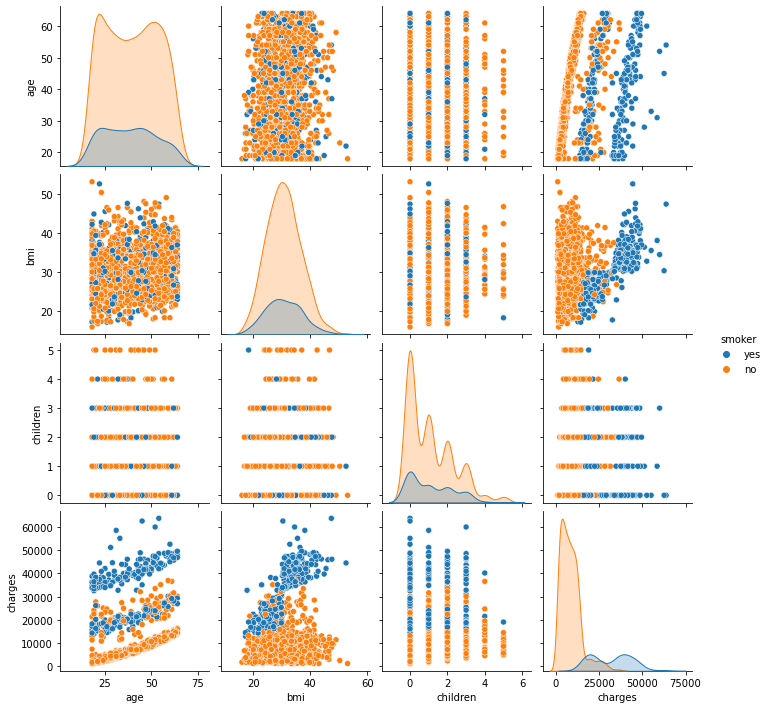

In [42]:
#  Pair plot with hue
sns.pairplot(ins, hue='smoker')
plt.show()

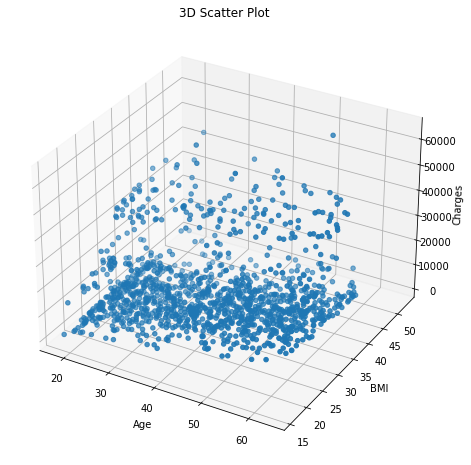

In [43]:
#  3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ins['age'], ins['bmi'], ins['charges'])
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')
plt.title('3D Scatter Plot')
plt.show()

Multivariate Analysis

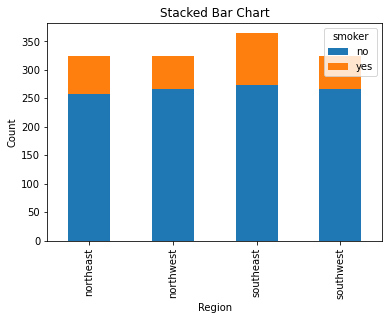

In [44]:
#  Stacked bar chart
stacked_data = ins.groupby(['region', 'smoker']).size().unstack()
stacked_data.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked Bar Chart')
plt.show()

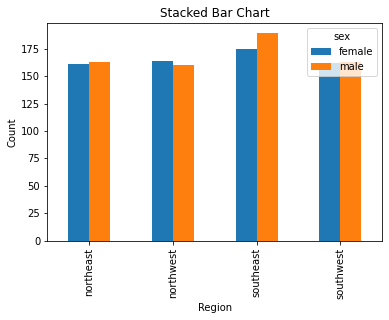

In [45]:
# Stacked bar chart
#plt.figure(figsize= (10,6))
stacked_data = ins.groupby(['region', 'sex']).size().unstack()
stacked_data.plot(kind='bar', stacked=False)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked Bar Chart')
plt.show()

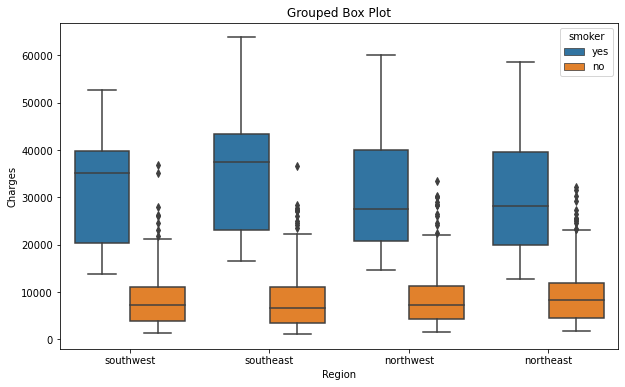

In [46]:
# Grouped box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=ins, x='region', y='charges', hue='smoker')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Grouped Box Plot')
plt.show()

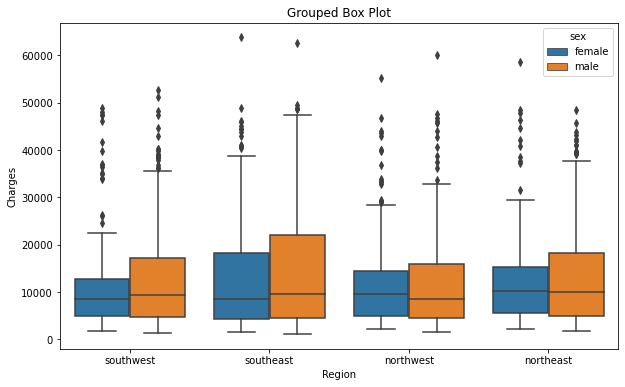

In [47]:
# Grouped box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=ins, x='region', y='charges', hue='sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Grouped Box Plot')
plt.show()

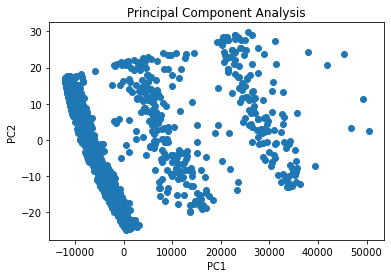

In [48]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(ins[['age', 'bmi', 'charges']])
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis')
plt.show()

C:\Users\debaj\AppData\Local\Temp\ipykernel_18296\2443380514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ins['cluster'] = kmeans.fit_predict(X)


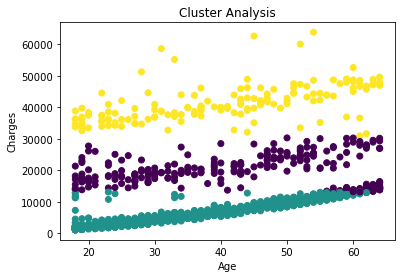

In [49]:
 #Cluster analysis
features = ['age', 'bmi', 'charges']
X = ins[features]
kmeans = KMeans(n_clusters=3)
ins['cluster'] = kmeans.fit_predict(X)
plt.scatter(ins['age'], ins['charges'], c=ins['cluster'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Cluster Analysis')
plt.show()

# correlation matrix

In [50]:
data = ins.copy()


In [51]:
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})


prepossecing scaler

2.Preprocessing : Scaler
Preprocessing is a crucial step before training the model. In this case, numerical features are standardized (mean removed and scaled to unit variance), and categorical features are one-hot encoded. Standardization is not required for all models but is generally a good practice. One-hot encoding is necessary for categorical variables to be correctly understood by the machine learning model.

The StandardScaler in sklearn is based on the assumption that the data, Y, follows a distribution that might not necessarily be Gaussian (normal), but we still transform it in a way that its distribution will have a mean value 0 and standard deviation of 1.

In other words, given a feature vector x, it modifies the values as follows:

Yi=xi−μ(x)/σ(x)
 
where:

xi: is the i-th element of the original feature vector x 
 ,
μ(x):is the mean of the feature vector, and
σ(x) :is the standard deviation of the feature vector.
The transformed data  Y
  (each  Yi
 ) will have properties such that  mean(Y)=0
  and  std(Y)=1
 .

This transformation is also known as Z-score normalization.

In [52]:
data

,age,sex,bmi,children,smoker,region,charges,cluster
0,19,female,27.900,0,1,southwest,16884.92400,0
1,18,male,33.770,1,0,southeast,1725.55230,1
2,28,male,33.000,3,0,southeast,4449.46200,1
3,33,male,22.705,0,0,northwest,21984.47061,0
4,32,male,28.880,0,0,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830,1
1334,18,female,31.920,0,0,northeast,2205.98080,1
1335,18,female,36.850,0,0,southeast,1629.83350,1
1336,21,female,25.800,0,0,southwest,2007.94500,1


In [53]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler object
scaler = MinMaxScaler()

In [54]:
numerical_columns = ['age', 'bmi', 'children','smoker','charges']  # Replace with the actual column names in your data

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(data[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)


In [55]:
scaled_numerical_df

,age,bmi,children,smoker,charges
0,0.021739,0.321227,0.0,1.0,0.251611
1,0.000000,0.479150,0.2,0.0,0.009636
2,0.217391,0.458434,0.6,0.0,0.053115
3,0.326087,0.181464,0.0,0.0,0.333010
4,0.304348,0.347592,0.0,0.0,0.043816
...,...,...,...,...,...
1332,0.695652,0.403820,0.6,0.0,0.151299
1333,0.000000,0.429379,0.0,0.0,0.017305
1334,0.000000,0.562012,0.0,0.0,0.008108
1335,0.065217,0.264730,0.0,0.0,0.014144


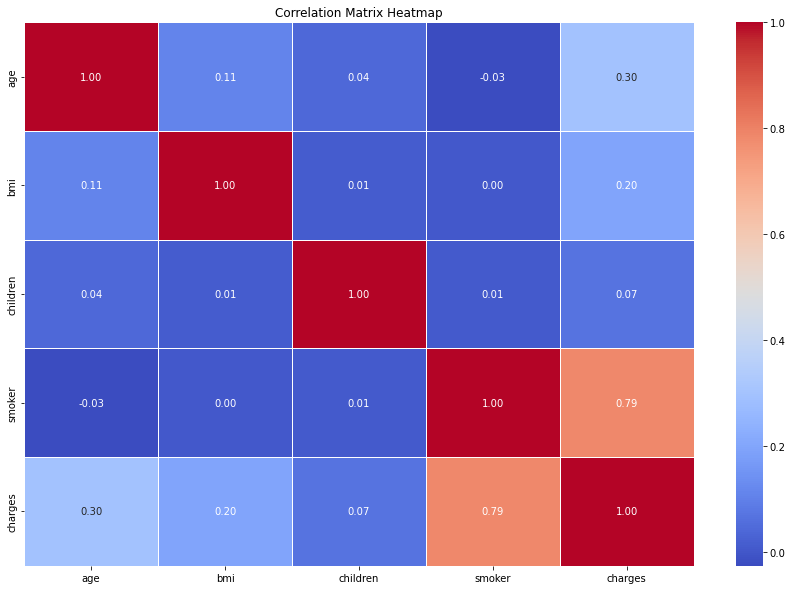

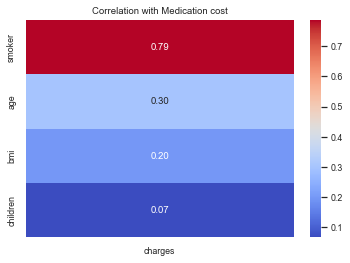

In [56]:
correlation_matrix =scaled_numerical_df.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = scaled_numerical_df.corr()
target_corr = corr['charges'].drop('charges')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Medication cost')
plt.show()

These correlation coefficients represent the relationship between each variable and the charges variable. A positive correlation indicates that as the variable increases, the charges also tend to increase. A negative correlation indicates that as the variable increases, the charges tend to decrease.



Smoker : With a correlation of 0.787251, this is the variable most strongly positively correlated with charges. This suggests that smokers tend to have higher medical costs, which is consistent with the fact that smoking is a significant risk factor for many health conditions.

Age : This variable has a moderate positive correlation of 0.299008 with charges. This suggests that older individuals tend to have higher medical costs, likely due to the increased risk of health issues with age.

BMI : This variable has a weak positive correlation of 0.198341 with charges. This suggests that individuals with higher BMI values tend to have slightly higher medical costs, possibly due to the health risks associated with high BMI.This suggests that beneficiaries in the southeast region might have slightly higher medical costs, but the relationship is weak.

Children : This variable has a very weak positive correlation of 0.067998 with charges. This suggests that beneficiaries with more children tend to have slightly higher medical costs, but the relationship is weak.

Sex_male : This variable has a very weak positive correlation of 0.057292 with charges. This suggests that male beneficiaries might have slightly higher medical costs, but the relationship is weak.

cluster analysis

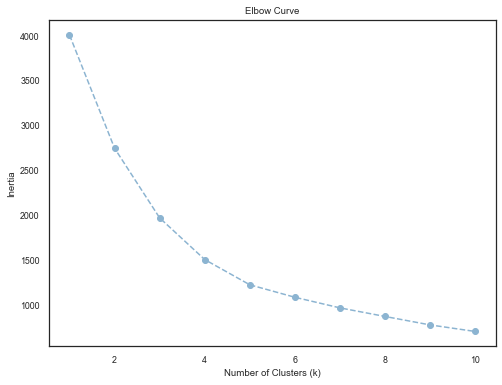

In [57]:
# Select the features for clustering
features = ['age', 'bmi', 'charges']
categorical_features = ['sex', 'smoker']

# Convert categorical features into numerical using one-hot encoding
df_encoded = pd.get_dummies(ins, columns=categorical_features, drop_first=True)

X = df_encoded[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

The Elbow Method is a technique used to help find the optimal number of clusters in K-means clustering . The x-axis represents the number of clusters (k), and the y-axis represents the inertia, which is a measure of the total distance of each point to its respective centroid.

The plot shows a sharp decrease in inertia as the number of clusters increases from 1 to around 4. After that, the decrease in inertia becomes less pronounced. This point, where the decrease in inertia starts to level off, is known as the "elbow", and it suggests that the optimal number of clusters is around 4.

This means that adding more clusters beyond 4 doesn't significantly improve the compactness of the clusters, and it might even lead to overfitting, where the clusters are too specific to the training data and don't generalize well to new data.

C:\Users\debaj\AppData\Local\Temp\ipykernel_18296\1227312448.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ins['cluster'] = labels


               age        bmi       charges
cluster                                    
0        50.618557  26.677577  13932.645135
1        25.784394  28.151119   6147.102451
2        40.067485  35.387607  40468.649817
3        45.859532  37.352375   9225.051176


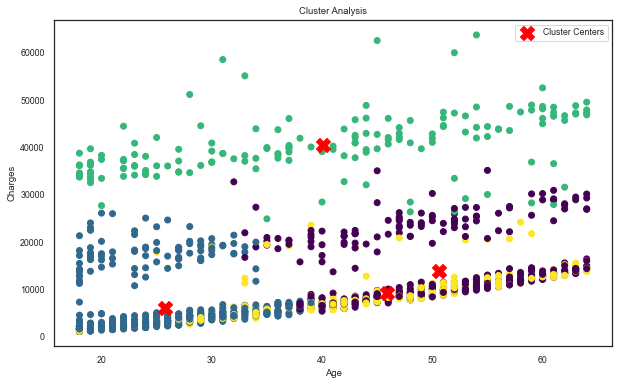

In [58]:
# Choose the optimal number of clusters based on the elbow curve (4)
k = 4

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add the cluster labels to the dataset
ins['cluster'] = labels

# Analyze the clusters
cluster_analysis = ins.groupby('cluster')[features].mean()
print(cluster_analysis)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(ins['age'], ins['charges'], c=ins['cluster'], cmap='viridis')
plt.scatter(cluster_analysis['age'], cluster_analysis['charges'], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Cluster Analysis')
plt.legend()
plt.show()

Intepret the results


Looking at the K-means clustering visualization, we can see that the data points are grouped into distinct clusters. Each data point represents a beneficiary, and the color of the point indicates the cluster to which the beneficiary belongs. The black crosses denote the centroids of the clusters, which are essentially the mean values of the beneficiaries in each cluster.

The table provides the mean values of age, bmi, and charges for each cluster:

Cluster 0: Beneficiaries in this cluster have an average age of around 51, an average BMI of approximately 26.7, and an average charge of about 13,932.

Cluster 1: This cluster consists of younger beneficiaries with an average age of around 26, a slightly higher average BMI of about 28.2, and a lower average charge of around 6,147.

Cluster 2: Beneficiaries in this cluster have an average age of around 40, a higher average BMI of around 35.4, and a significantly higher average charge of about 40,469.

Cluster 3: This cluster includes beneficiaries with an average age of around 46, the highest average BMI of about 37.4, and an average charge of around 9,225.

These clusters could represent different segments of beneficiaries. For instance, Cluster 0 might include older beneficiaries with a relatively low BMI and medium charges, while Cluster 2 might consist of middle-aged beneficiaries with a high BMI and high charges.

# predictive analysis

We employ a Gradient Boosting Regressor , a powerful ensemble learning method that combines multiple weak prediction models to create a robust predictive model. We conduct a comprehensive evaluation of the model's performance, using a suite of error metrics including Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-Squared (R2), Root Mean Squared Logarithmic Error (RMSLE), and Mean Absolute Percentage Error (MAPE) . To ensure the generalizability of the model, we use 10-fold cross-validation , a robust technique for estimating the performance of a model on unseen data.

In addition to model training and evaluation, we delve into exploratory data analysis and feature importance assessment, shedding light on the key drivers of medical costs. We also tune the model's hyperparameters to optimize its performance and visualize the learning process, providing insights into the model's behavior and effectiveness.

In [59]:
#Apply Label Encoding to the categorical columns
le = LabelEncoder()
ins['sex'] = le.fit_transform(ins['sex'])
ins['smoker'] = le.fit_transform(ins['smoker'])
ins['region'] = le.fit_transform(ins['region'])

C:\Users\debaj\AppData\Local\Temp\ipykernel_18296\3278022188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ins['sex'] = le.fit_transform(ins['sex'])
C:\Users\debaj\AppData\Local\Temp\ipykernel_18296\3278022188.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ins['smoker'] = le.fit_transform(ins['smoker'])
C:\Users\debaj\AppData\Local\Temp\ipykernel_18296\3278022188.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [60]:
ins

,age,sex,bmi,children,smoker,region,charges,cluster
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,1


In [61]:
ins[0:1]

,age,sex,bmi,children,smoker,region,charges,cluster
0,19,0,27.9,0,1,3,16884.924,1


In [62]:
# Split data into features (X) and target (y)
X = ins.drop(columns=['charges','cluster'])
y = ins['charges']

In [63]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [64]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Define scores and Model

In [65]:
def scores(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [66]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])


# Linear Regression

In [67]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
predictions = linreg.predict(X_test)

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

 
Mean Squared Error (MSE) is the mean of the squared errors:
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
 
R Squared (R^2) is the portion of the variation in the dependent variable that is predictable from the independent variable:
R2=1−RSS/TSS
 
RSS = sum of squared residuals 
TSS = total sum of squares



In [68]:
mae, mse, rmse, r_squared = scores(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "Linear Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 4182.3531552883005
MSE: 35493102.61165055
RMSE: 5957.608799816462
R2 Score: 0.806846632262911


C:\Users\debaj\AppData\Local\Temp\ipykernel_18296\1553343053.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


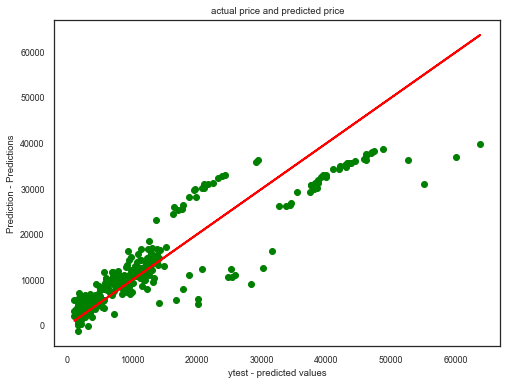

In [69]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test,predictions,color = 'green')
plt.xlabel("ytest - predicted values")
plt.ylabel("Prediction - Predictions")
plt.plot(y_test, y_test, color = 'red', linewidth = 2)
plt.title('actual price and predicted price')
plt.show()

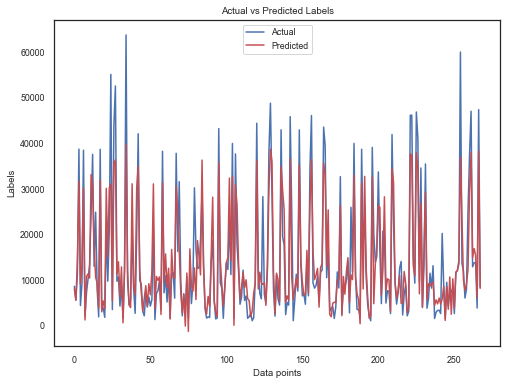

In [70]:
import matplotlib.pyplot as plt


# Plot the predicted and actual labels
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, color='b', label='Actual')
plt.plot(range(len(y_test)), predictions, color='r', label='Predicted')
plt.xlabel('Data points')
plt.ylabel('Labels')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.show()

# Ridge regression

In [71]:
ridge_reg = Ridge(alpha=0.5)  
ridge_reg.fit(X_train, y_train)
predictions_ridge = ridge_reg.predict(X_test)

In [72]:
mae, mse, rmse, r_squared = scores(y_test, predictions_ridge)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "Rdige Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 4190.301452202515
MSE: 35579592.08055707
RMSE: 5964.863123371489
R2 Score: 0.8063759568087002


C:\Users\debaj\AppData\Local\Temp\ipykernel_18296\3434608951.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


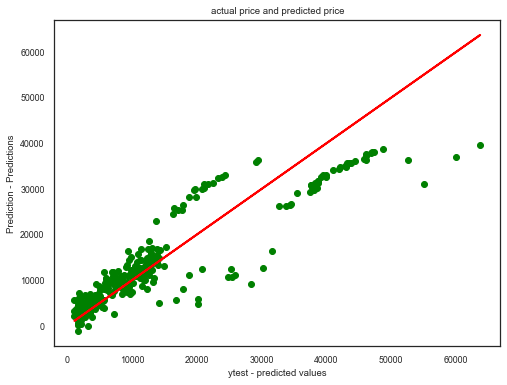

In [73]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test,predictions_ridge,color = 'green')
plt.xlabel("ytest - predicted values")
plt.ylabel("Prediction - Predictions")
plt.plot(y_test, y_test, color = 'red', linewidth = 2)
plt.title('actual price and predicted price')
plt.show()

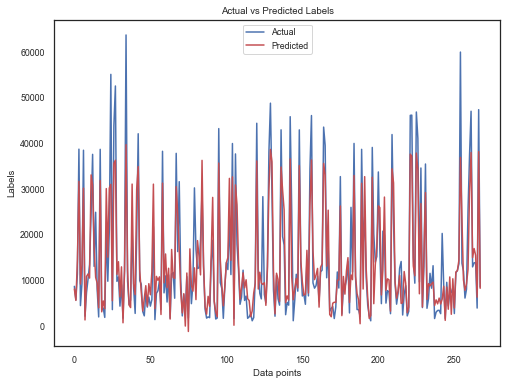

In [74]:
import matplotlib.pyplot as plt


# Plot the predicted and actual labels
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, color='b', label='Actual')
plt.plot(range(len(y_test)), predictions_ridge, color='r', label='Predicted')
plt.xlabel('Data points')
plt.ylabel('Labels')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.show()

# Lassso Regression

In [75]:
lasso_reg = Lasso(alpha=0.5)  
lasso_reg.fit(X_train, y_train)
predictions_lasso = lasso_reg.predict(X_test)

In [76]:
mae, mse, rmse, r_squared = scores(y_test, predictions_lasso)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "Lasso Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 4182.702342126683
MSE: 35497749.54583423
RMSE: 5957.998786995028
R2 Score: 0.8068213436597407


C:\Users\debaj\AppData\Local\Temp\ipykernel_18296\1295713764.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


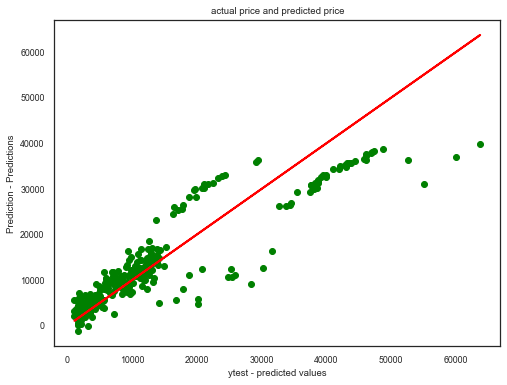

In [77]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test,predictions_lasso,color = 'green')
plt.xlabel("ytest - predicted values")
plt.ylabel("Prediction - Predictions")
plt.plot(y_test, y_test, color = 'red', linewidth = 2)
plt.title('actual price and predicted price')
plt.show()

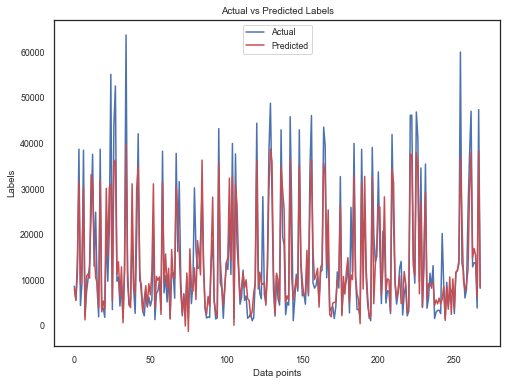

In [78]:
import matplotlib.pyplot as plt


# Plot the predicted and actual labels
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, color='b', label='Actual')
plt.plot(range(len(y_test)), predictions_lasso, color='r', label='Predicted')
plt.xlabel('Data points')
plt.ylabel('Labels')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.show()

# Random Forest regressor

In [79]:
rf_reg = RandomForestRegressor(n_estimators=100)  
rf_reg.fit(X_train, y_train)
predictions_rf = rf_reg.predict(X_test)

In [80]:
mae, mse, rmse, r_squared = scores(y_test, predictions_rf)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "Random Forest Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 2505.0143911324626
MSE: 20740975.453302067
RMSE: 4554.226109154229
R2 Score: 0.8871276680770487


C:\Users\debaj\AppData\Local\Temp\ipykernel_18296\3236387199.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


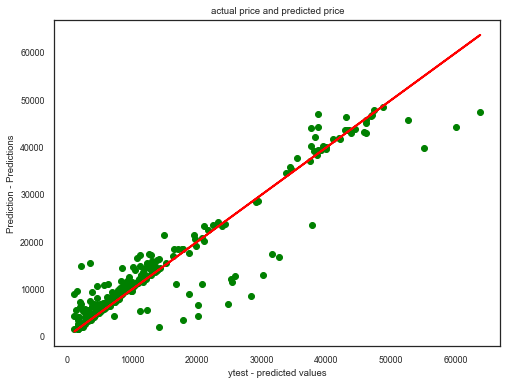

In [81]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test,predictions_rf,color = 'green')
plt.xlabel("ytest - predicted values")
plt.ylabel("Prediction - Predictions")
plt.plot(y_test, y_test, color = 'red', linewidth = 2)
plt.title('actual price and predicted price')
plt.show()

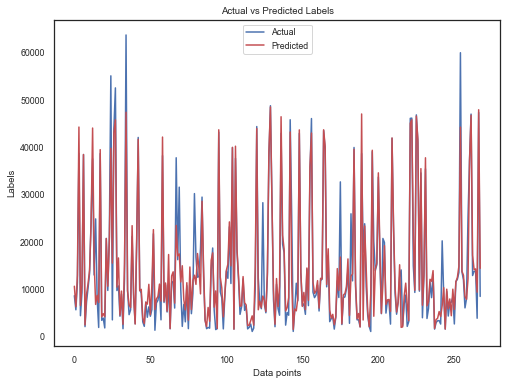

In [82]:
import matplotlib.pyplot as plt


# Plot the predicted and actual labels
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, color='b', label='Actual')
plt.plot(range(len(y_test)), predictions_rf, color='r', label='Predicted')
plt.xlabel('Data points')
plt.ylabel('Labels')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.show()

In [83]:
#models

# Support vector regressor

In [84]:
svr_reg = SVR(kernel='rbf')  # You can choose different kernel functions (e.g., 'linear', 'poly', 'sigmoid')
svr_reg.fit(X_train, y_train)
predictions_svr = svr_reg.predict(X_test)

In [85]:
mae, mse, rmse, r_squared = scores(y_test, predictions_svr)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 9249.868277505902
MSE: 208461377.55691546
RMSE: 14438.191630426418
R2 Score: -0.13444624886115553


C:\Users\debaj\AppData\Local\Temp\ipykernel_18296\593114800.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


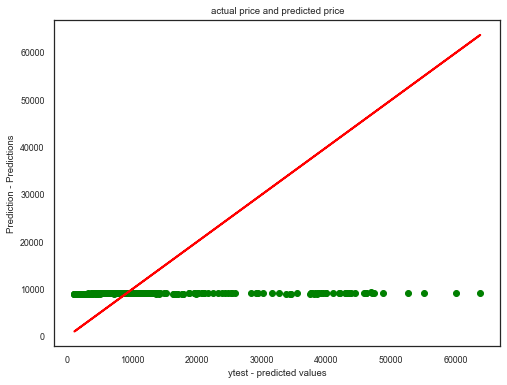

In [86]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test,predictions_svr,color = 'green')
plt.xlabel("ytest - predicted values")
plt.ylabel("Prediction - Predictions")
plt.plot(y_test, y_test, color = 'red', linewidth = 2)
plt.title('actual price and predicted price')
plt.show()

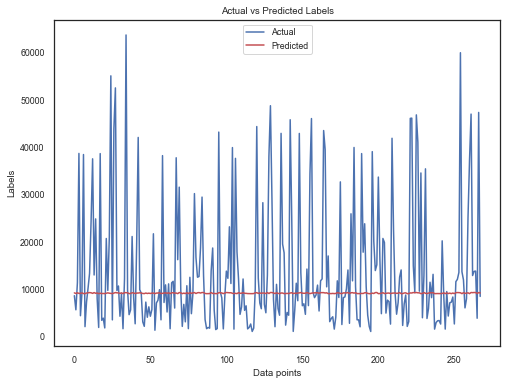

In [87]:
import matplotlib.pyplot as plt


# Plot the predicted and actual labels
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, color='b', label='Actual')
plt.plot(range(len(y_test)),predictions_svr, color='r', label='Predicted')
plt.xlabel('Data points')
plt.ylabel('Labels')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.show()

# Gradient Boosting

In [88]:



# Initialize the model
model = GradientBoostingRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [89]:
# Perform 10-fold CV
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print(f"Cross-validated MSE: {-np.mean(scores)}")

Cross-validated MSE: 22539179.595214732


The first printout indicates the Cross-Validated Mean Squared Error (MSE) for the model is approximately 22,539,179.59. The MSE is a measure of how close the model's predictions are to the actual outcomes; lower values are better.

However, the value itself might not be as informative unless compared to a baseline model or other models' MSEs. It's important to note that the MSE value is quite high, which might be because the charges values in the dataset are also high.

In [90]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 4, 5]
}

In [91]:
# Initialize the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


In [92]:
# Update the model with the best parameters
model = grid_search.best_estimator_

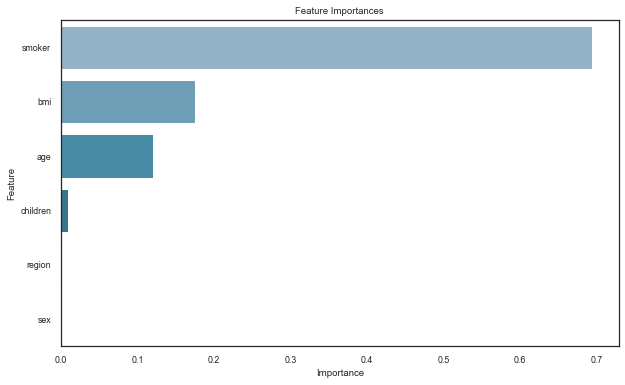

In [93]:
# Get feature importances
importances = model.feature_importances_

# Create a dataframe
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.savefig("C:\\Users\\debaj\\Desktop\\Project Practis\\medical project\\medical project\\feature_importance.png")

plt.show()

Smoker : This feature has the highest importance (~69.42%) among all features in predicting 'charges'. This suggests that whether a beneficiary is a smoker or not is the most significant factor influencing medical costs according to the model.

BMI : The Body Mass Index comes second in importance, with ~17.50%. This implies that an individual's BMI is another important factor for the medical costs.

Age : Age ranks third in feature importance (~12.04%). This tells us that the age of the primary beneficiary also plays a substantial role in predicting themedical costs.

Children : The number of children covered by health insurance has a small impact (~0.90%) on the medical costs.

Region : The beneficiary's residential area in the US is also a factor, albeit a very minor one (~0.13%).

Sex : Gender seems to have the least importance in the model (~0.01%). This indicates that according to the model, the gender of the insurance contractor has negligible influence on the medical costs.

In [94]:
# Make predictions
y_pred = model.predict(X_test)

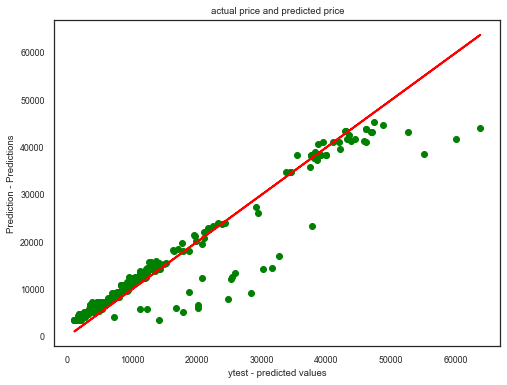

In [95]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred,color = 'green')
plt.xlabel("ytest - predicted values")
plt.ylabel("Prediction - Predictions")
plt.plot(y_test, y_test, color = 'red', linewidth = 2)
plt.title('actual price and predicted price')
plt.savefig("C:\\Users\\debaj\\Desktop\\Project Practis\\medical project\\medical project\\boosting _scatter.png")

plt.show()

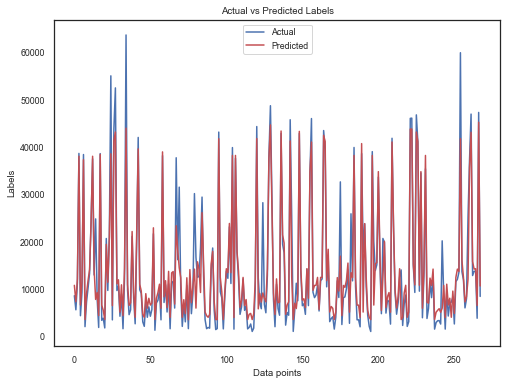

In [96]:
import matplotlib.pyplot as plt


# Plot the predicted and actual labels
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, color='b', label='Actual')
plt.plot(range(len(y_test)), y_pred, color='r', label='Predicted')
plt.xlabel('Data points')
plt.ylabel('Labels')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.savefig("C:\\Users\\debaj\\Desktop\\Project Practis\\medical project\\medical project\\boosting_plot.png")

plt.show()

In [97]:
import math

In [98]:
# Calculate MAE, MSE, RMSE, R2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # or mse**(0.5)  
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 2624.030108580309
MSE: 18940147.779563934
RMSE: 4352.028007672277
R2 Score: 0.8969277673724676


In [99]:
new_row = {"Model": "Gradient Boosting Algorithm ","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}
models = models.append(new_row, ignore_index=True)

C:\Users\debaj\AppData\Local\Temp\ipykernel_18296\59856785.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [100]:
models.sort_values(by="R2 Score", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
5,Gradient Boosting Algorithm,2624.030109,18940147.779564,4352.028008,0.896928
3,Random Forest Regression,2505.014391,20740975.453302,4554.226109,0.887128
0,Linear Regression,4182.353155,35493102.611651,5957.6088,0.806847
2,Lasso Regression,4182.702342,35497749.545834,5957.998787,0.806821
1,Rdige Regression,4190.301452,35579592.080557,5964.863123,0.806376
4,SVR,9249.868278,208461377.556915,14438.19163,-0.134446
